In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [8]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        './Dataset/train',  
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='sparse')

Found 1506 images belonging to 3 classes.


In [10]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [11]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [12]:
validation_datagen   = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
        './Dataset/val',
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='sparse')

Found 215 images belonging to 3 classes.


In [13]:
test_datagen   = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        './Dataset/test',
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='sparse')

Found 431 images belonging to 3 classes.


In [14]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=50,
)

Epoch 1/50
47/47 [==============================] - 321s 7s/step - loss: 0.9194 - accuracy: 0.5027 - val_loss: 0.8764 - val_accuracy: 0.4896
Epoch 2/50
47/47 [==============================] - 288s 6s/step - loss: 0.7539 - accuracy: 0.6703 - val_loss: 1.0286 - val_accuracy: 0.5729
Epoch 3/50
47/47 [==============================] - 285s 6s/step - loss: 0.6230 - accuracy: 0.7402 - val_loss: 0.8760 - val_accuracy: 0.6562
Epoch 4/50
47/47 [==============================] - 285s 6s/step - loss: 0.5442 - accuracy: 0.7680 - val_loss: 0.7661 - val_accuracy: 0.6875
Epoch 5/50
47/47 [==============================] - 287s 6s/step - loss: 0.4593 - accuracy: 0.8168 - val_loss: 0.6909 - val_accuracy: 0.7188
Epoch 6/50
47/47 [==============================] - 287s 6s/step - loss: 0.3458 - accuracy: 0.8582 - val_loss: 1.2275 - val_accuracy: 0.6823
Epoch 7/50
47/47 [==============================] - 282s 6s/step - loss: 0.2700 - accuracy: 0.8908 - val_loss: 0.6392 - val_accuracy: 0.7917
Epoch 8/50
47

In [17]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 22s 2s/step - loss: 0.1015 - accuracy: 0.9722


In [18]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 47}

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

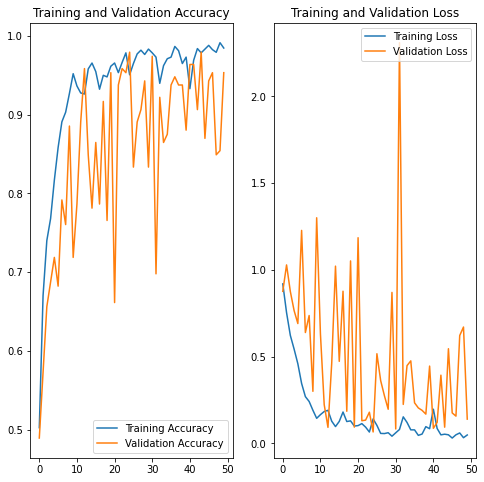

In [20]:
EPOCHS = 50

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

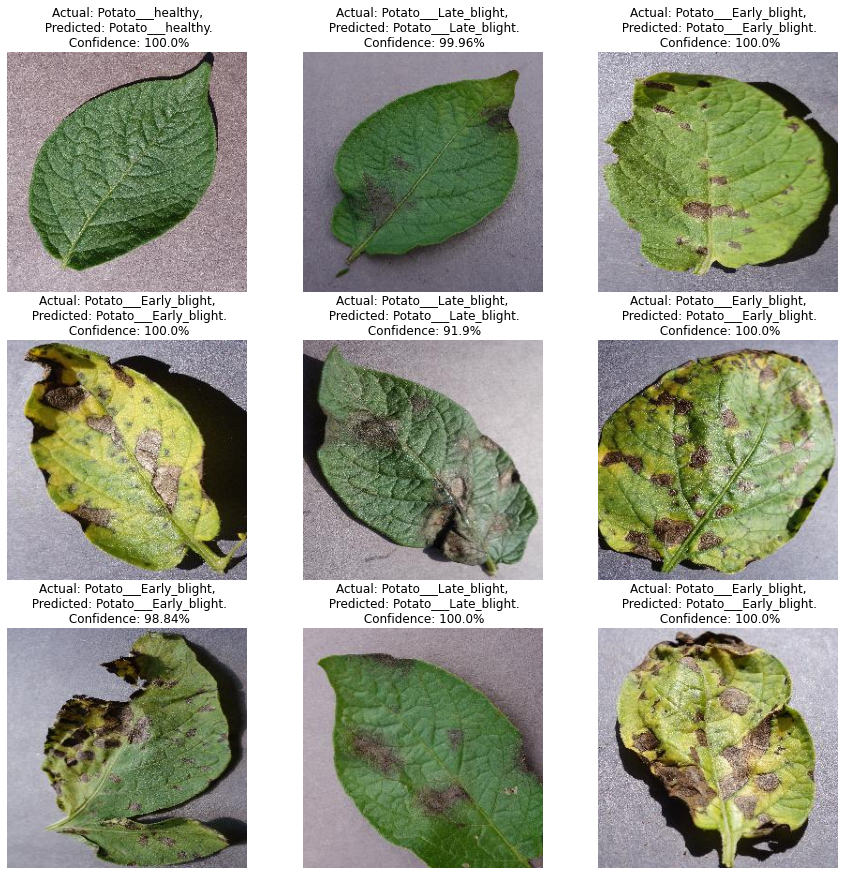

In [22]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [23]:
model.save("saved_model")

INFO:tensorflow:Assets written to: saved_model\assets


In [24]:
model.save("model_potato.h5")

In [ ]:
m = tf.keras.models.load_model('saved_model')

In [ ]:
image = tf.keras.preprocessing.image.load_img('download.png', target_size=(256, 256))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = m.predict(input_arr)

In [ ]:
print(predictions)